In [2]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns

sns.set_style('darkgrid')

In [3]:
homicidios = pd.read_csv(r"C:\Users\roylo\OneDrive\Documentos\Data Science\Proyectos Individuales\Data Analytics\Datasets\homicidios.xlsx - HECHOS.csv")

homicidios.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,1/1/2016,2016,1,1,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,1/2/2016,2016,1,2,1:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,1/3/2016,2016,1,3,7:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,1/10/2016,2016,1,10,0:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,1/21/2016,2016,1,21,5:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


## **`Analisis Univariable`**

In [4]:
homicidios.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

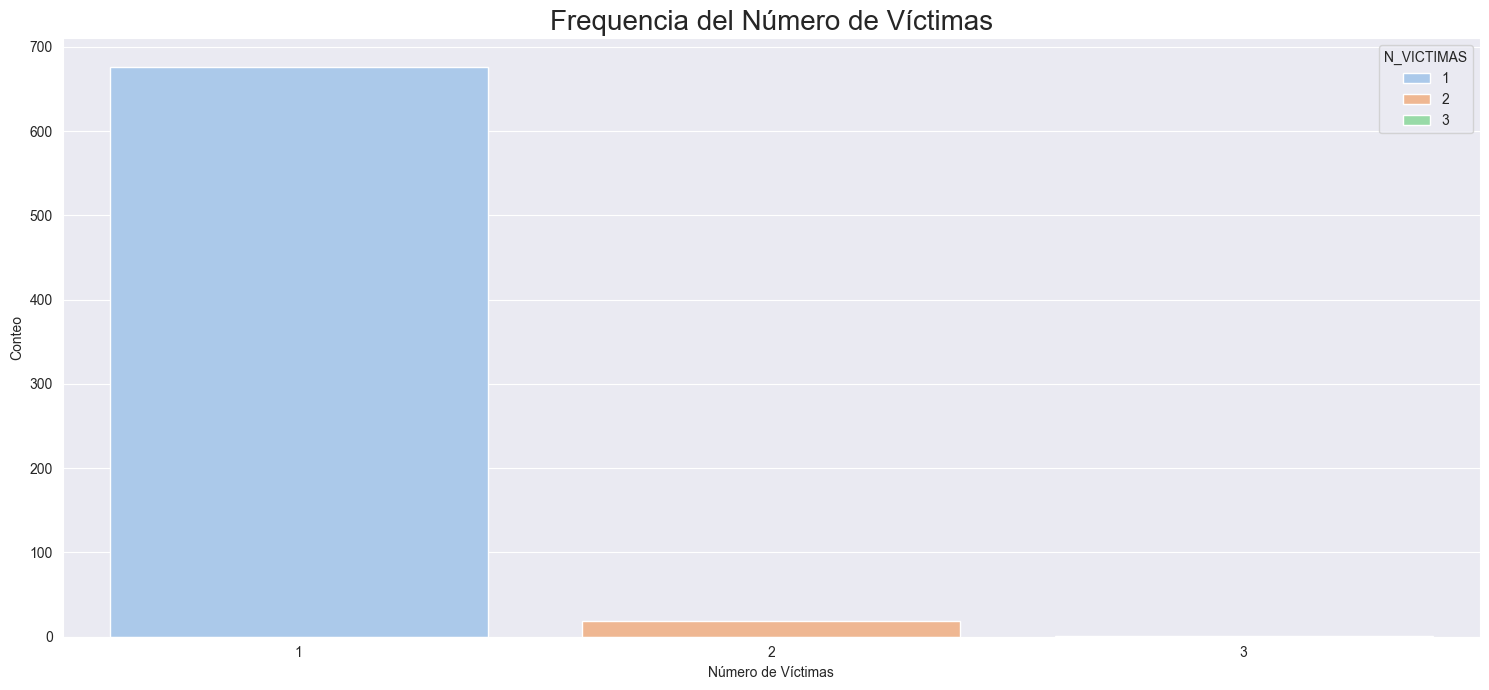

In [5]:
plt.figure(figsize=(15,7))

sns.countplot(data=homicidios, x='N_VICTIMAS', hue='N_VICTIMAS', palette='pastel')

plt.title("Frequencia del Número de Víctimas", fontsize=20)
plt.ylabel("Conteo")
plt.xlabel("Número de Víctimas")
plt.tight_layout()
plt.show()

Observaciones:

- El número de víctimas más frecuente es uno.

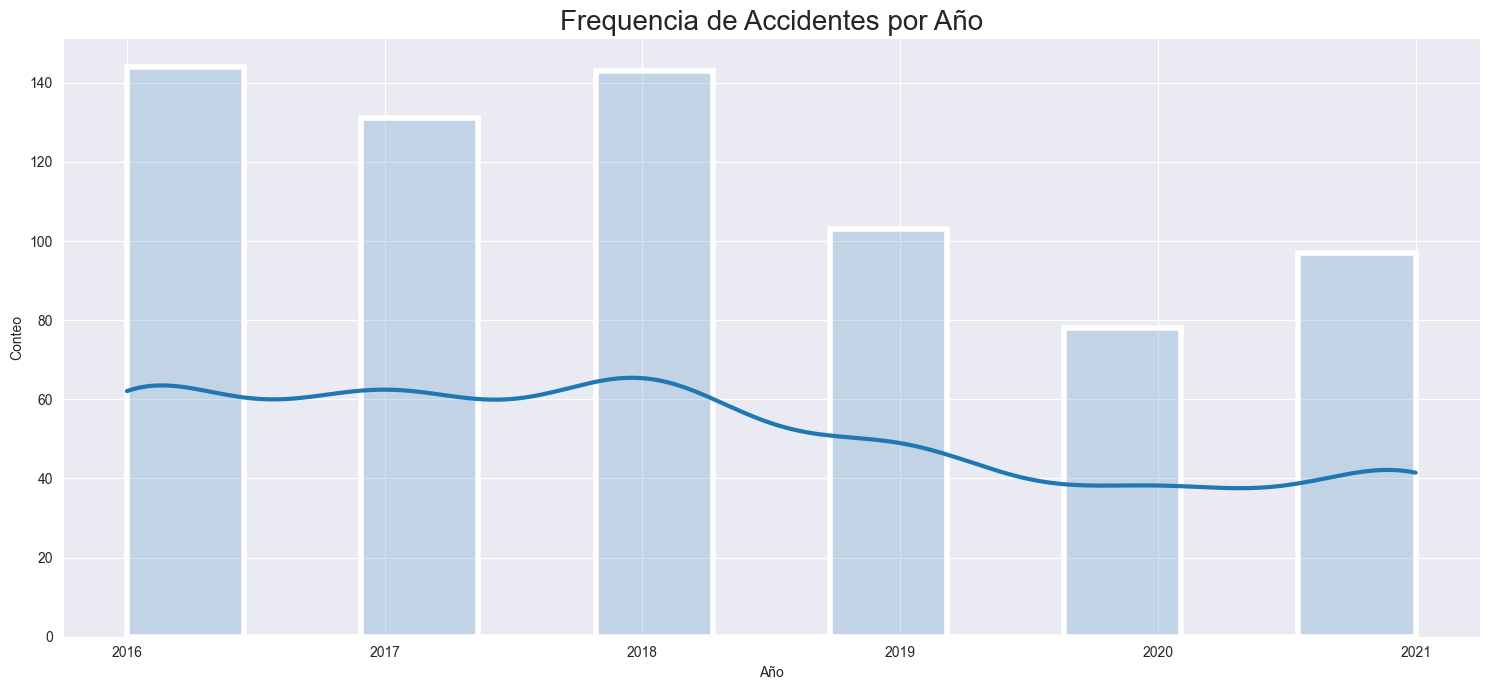

In [6]:
plt.figure(figsize=(15,7))

sns.histplot(data=homicidios, x='AAAA', kde=True, alpha=0.2, linewidth=4, line_kws={'linewidth':3})

plt.title("Frequencia de Accidentes por Año", fontsize=20)
plt.ylabel("Conteo")
plt.xlabel("Año")
plt.tight_layout()
plt.show()

Observacioines:
 - Los accidentes tienden a bajar.

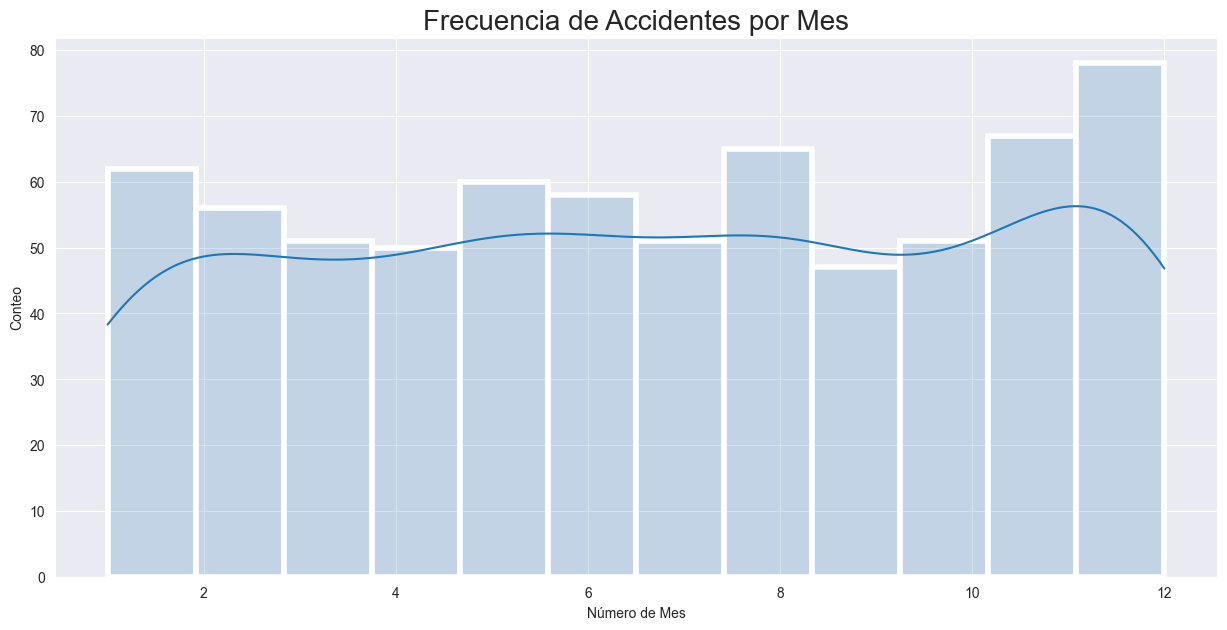

In [7]:
plt.figure(figsize=(15,7))

sns.histplot(data=homicidios, x='MM', kde=True, alpha=0.2, linewidth=4, bins=12)

plt.title("Frecuencia de Accidentes por Mes", fontsize=20)
plt.ylabel("Conteo")
plt.xlabel("Número de Mes")
plt.show()

Observaciones:

- Los accidentes están uniformemente distribuidos por la mayoría del año, aunque en Diciembre se disparan repentinamente. 

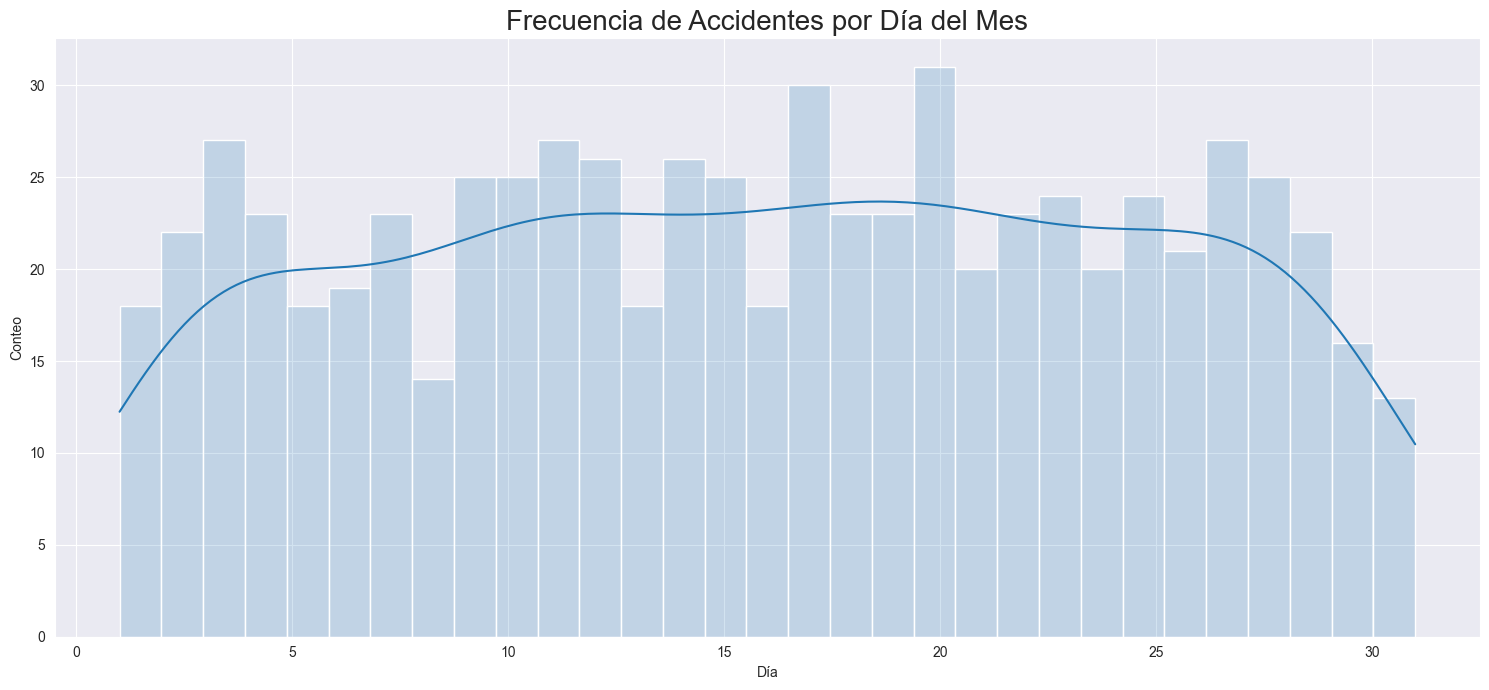

In [8]:
plt.figure(figsize=(15,7))

sns.histplot(data=homicidios, x='DD', kde=True, alpha=0.2, bins=31)

plt.title("Frecuencia de Accidentes por Día del Mes",fontsize=20)
plt.ylabel("Conteo")
plt.xlabel("Día")
plt.tight_layout()
plt.show()

Observaciones:

- La distribución de los accidentes es mayormente uniforme con una pequeña alza a la mitad del mes.

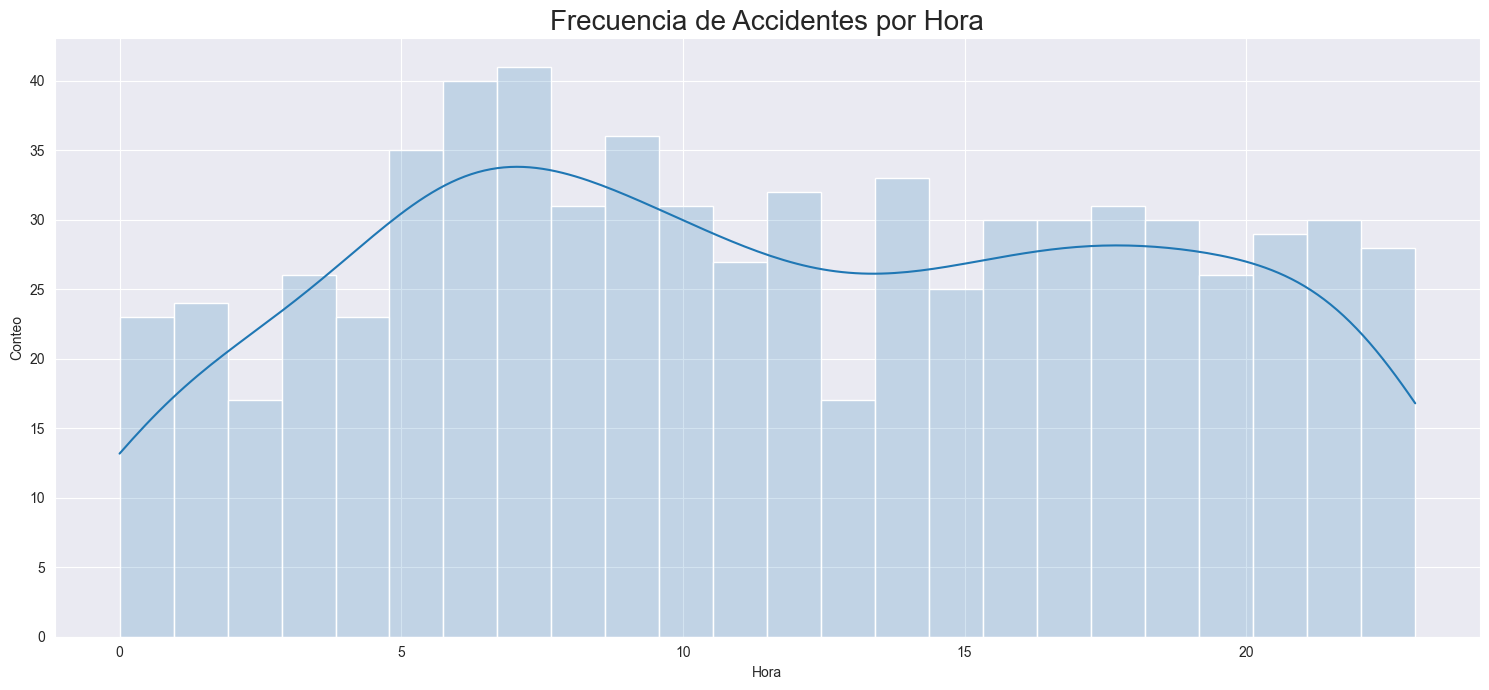

In [9]:
data = pd.to_numeric(homicidios[homicidios['HH']!='SD']['HH'])

plt.figure(figsize=(15,7))

sns.histplot(data=data, kde=True, alpha=0.2, bins=24)

plt.title("Frecuencia de Accidentes por Hora", fontsize=20)
plt.ylabel("Conteo")
plt.xlabel("Hora")
plt.tight_layout()
plt.show()

Observaciones:

- La distribución de los accidentes es mayormente uniforme con una pequeña alza desde las 5 hrs a las 7 hrs.

In [10]:
"Porcentaje de Lugares Únicos de la Varibale 'LUGAR_DEL_HECHO': " + str(int(homicidios['LUGAR_DEL_HECHO'].nunique()/len(homicidios)*100)) + "%"

"Porcentaje de Lugares Únicos de la Varibale 'LUGAR_DEL_HECHO': 98%"

Observaciones:

- Parece no haber ningún patrón respecto a un lugar específico, lo cual es esperable.

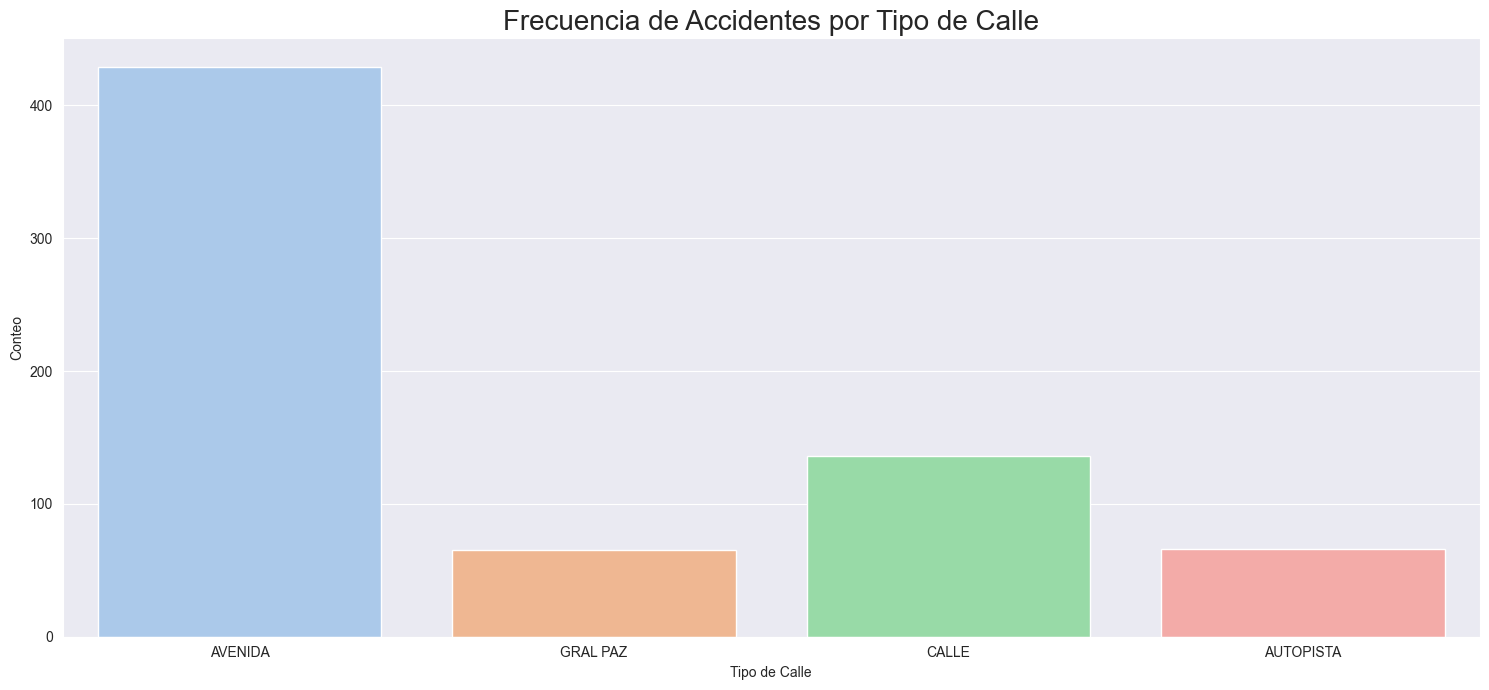

In [11]:
plt.figure(figsize=(15,7))

sns.countplot(data=homicidios, x='TIPO_DE_CALLE', hue='TIPO_DE_CALLE', palette='pastel', alpha=1)

plt.title("Frecuencia de Accidentes por Tipo de Calle", fontsize=20)
plt.ylabel("Conteo")
plt.xlabel("Tipo de Calle")
plt.tight_layout()
plt.show()

Observaciones:

- Los accidentes más comunes pasan en avenidas, lo que parace coherente ya que son lugares con mucha afluencia vehicular.

In [12]:
print("Porcentaje de Nulos de la variable 'Altura': " + str(int(homicidios[homicidios['Altura'].isnull()==True].shape[0]/len(homicidios)*100)) + "%")

print("Por lo tanto es una variable que no aporta mucha información")

Porcentaje de Nulos de la variable 'Altura': 81%
Por lo tanto es una variable que no aporta mucha información


In [13]:
homicidios['Dirección Normalizada'].value_counts()

Dirección Normalizada
27 DE FEBRERO AV. y ESCALADA AV.                  5
PAZ, GRAL. AV. y BALBIN, RICARDO, DR. AV.         4
PAZ, GRAL. AV. y DEL LIBERTADOR AV.               4
INDEPENDENCIA AV. y CEVALLOS, VIRREY              3
ALCORTA, AMANCIO AV. y BONAVENA, OSCAR NATALIO    3
                                                 ..
AUTOPISTA PERITO MORENO y AUTOPISTA 25 DE MAYO    1
CHORROARIN y SAN MARTIN AV.                       1
COSQUIN y ROCA, CNEL. AV.                         1
ROCA, CNEL. AV. 3555                              1
PADRE CARLOS MUGICA 709                           1
Name: count, Length: 635, dtype: int64

Observaciones:

- No hay ninguna dirección que tenga algún patrón, es decir, que tenga una frecuencia de accidentes que las demás.

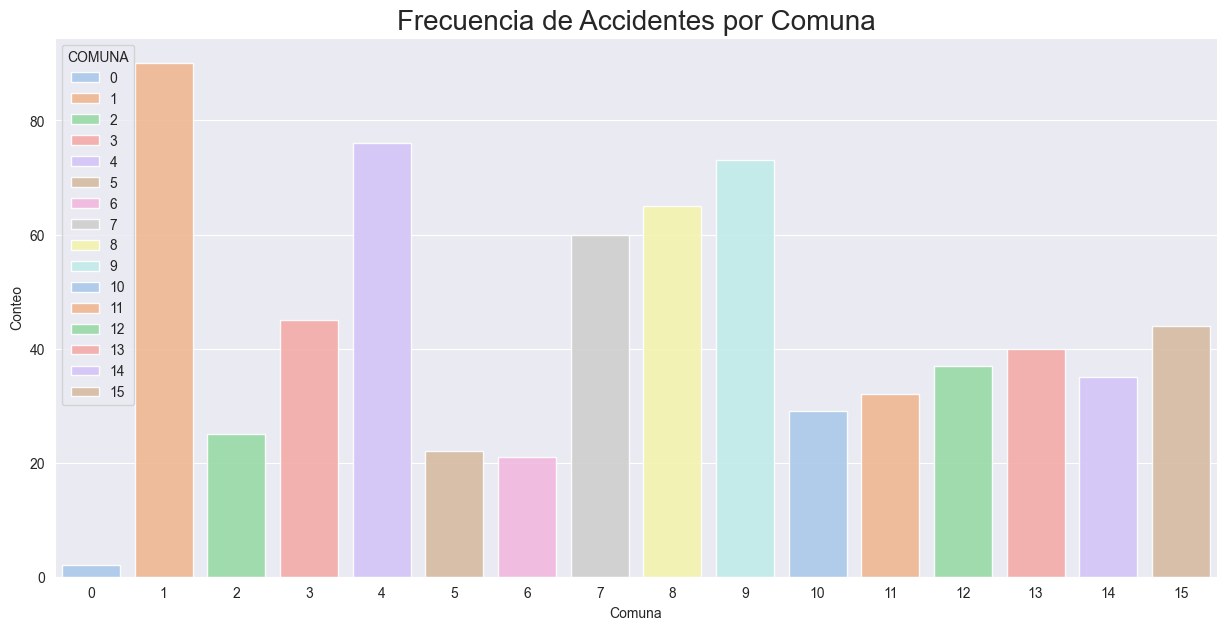

In [14]:
plt.figure(figsize=(15,7))

sns.countplot(data=homicidios, x='COMUNA', hue='COMUNA', palette='pastel', alpha=0.9)

plt.title("Frecuencia de Accidentes por Comuna", fontsize=20)
plt.ylabel("Conteo")
plt.xlabel("Comuna")
plt.show()

Observaciones:

- Las comunas [1,4,7,8,9], tienen una extraña frecuencia de accidentes respecto a las demás comunas.

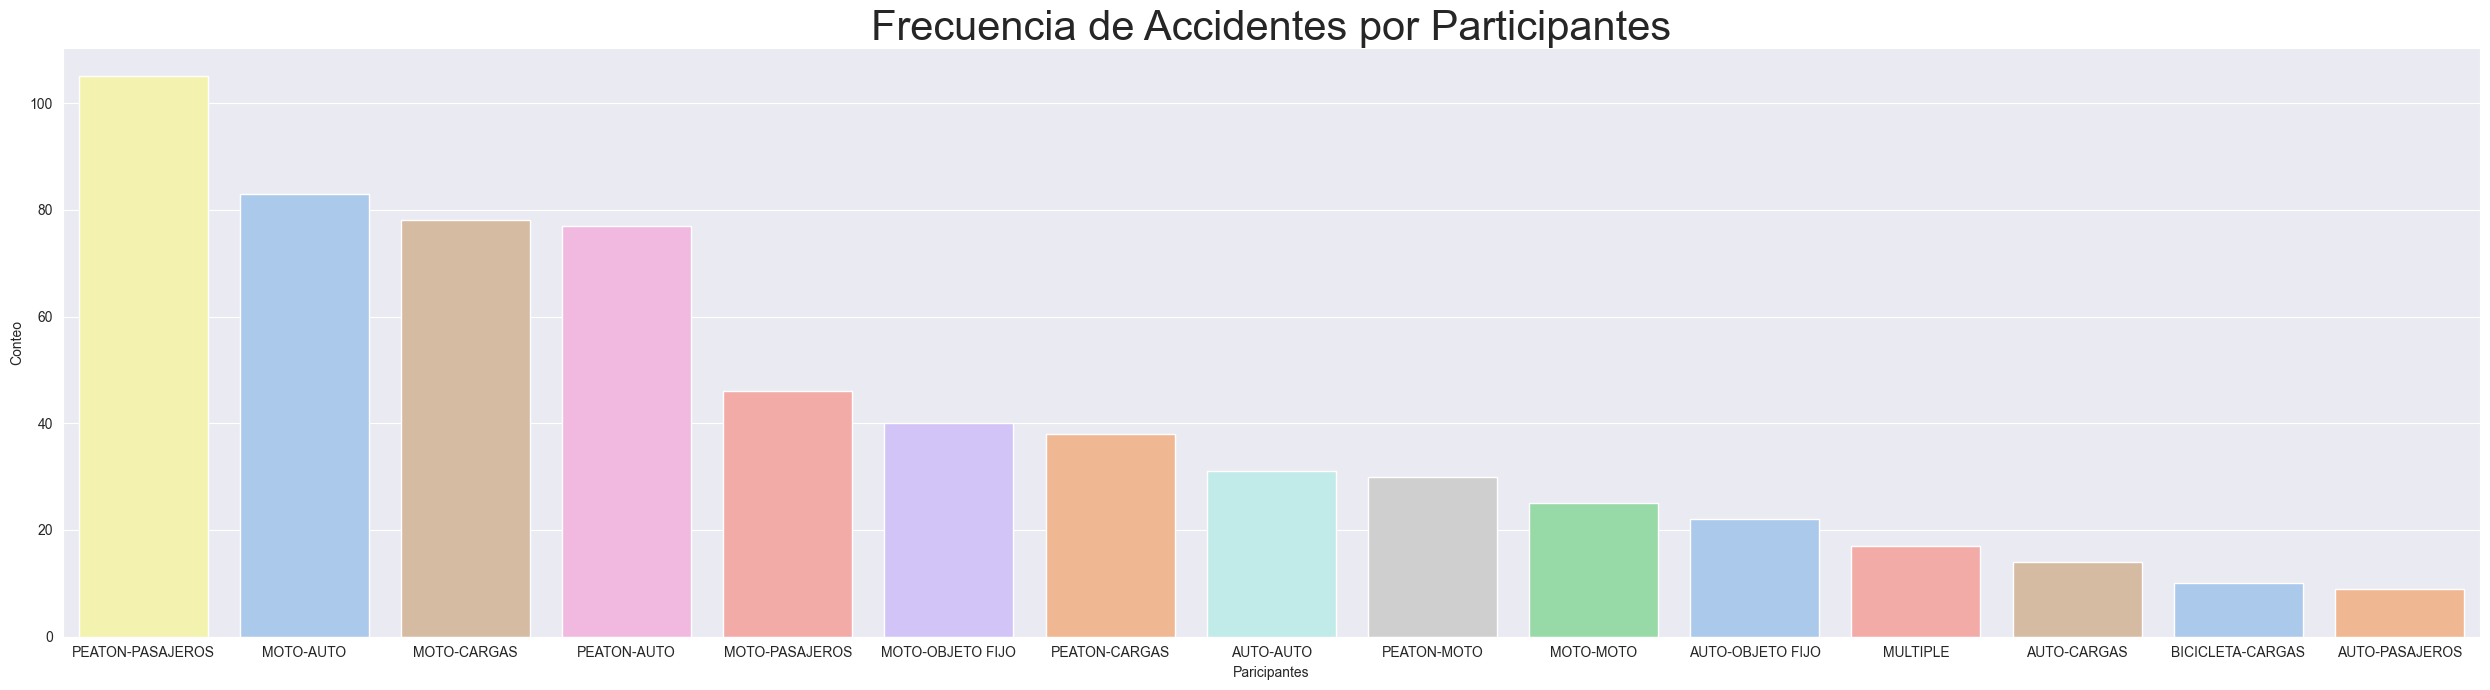

In [15]:
plt.figure(figsize=(25,7))

sns.countplot(data=homicidios, x='PARTICIPANTES', order=homicidios['PARTICIPANTES'].value_counts().index[:15], hue='PARTICIPANTES',palette='pastel')

plt.title("Frecuencia de Accidentes por Participantes", fontsize=30)
plt.ylabel("Conteo")
plt.xlabel("Paricipantes")
plt.tight_layout()
plt.show()

Observaciones:

- De las 15 frecuencias más altas, 7 involucran a una moto. 
- "PEATON-PASAJEROS" es un valor muy ambiguo por lo que no aporta mucha información.

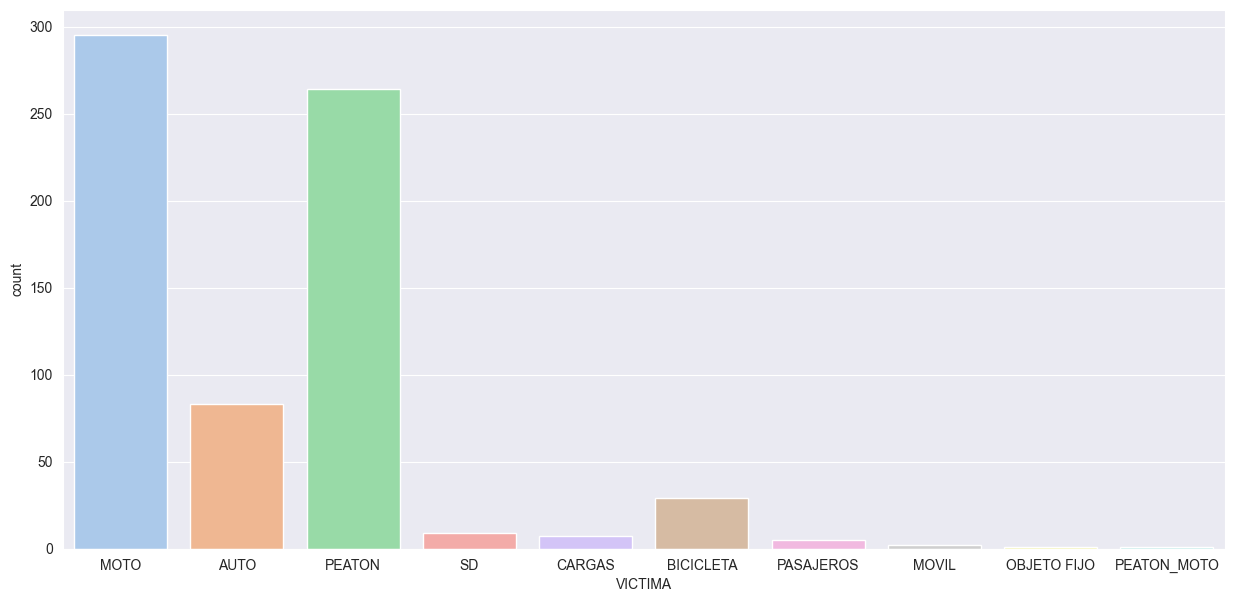

In [16]:
plt.figure(figsize=(15,7))

sns.countplot(data=homicidios, x='VICTIMA', hue='VICTIMA', palette='pastel', alpha=1)

plt.show()

Observaciones:

- En ésta gráfica es mucho más notable la observación de la variable anterior respecto a las motos.

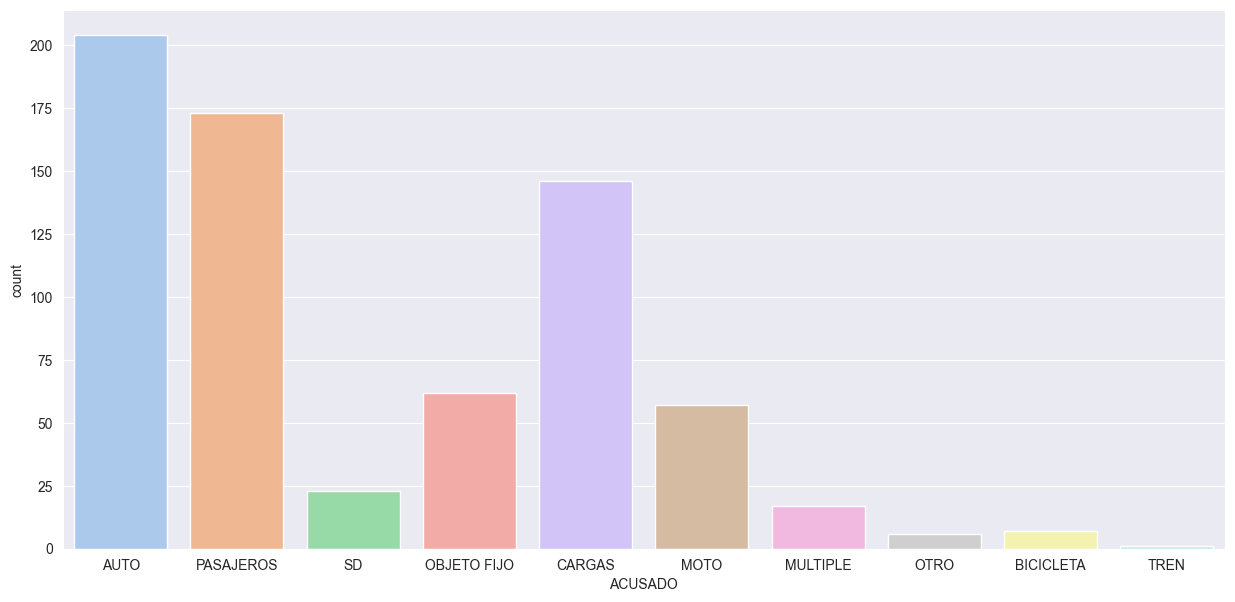

In [17]:
plt.figure(figsize=(15,7))

sns.countplot(data=homicidios, x='ACUSADO', hue='ACUSADO', palette='pastel', alpha=1)

plt.show()

## **`Análisis Bivariable`**

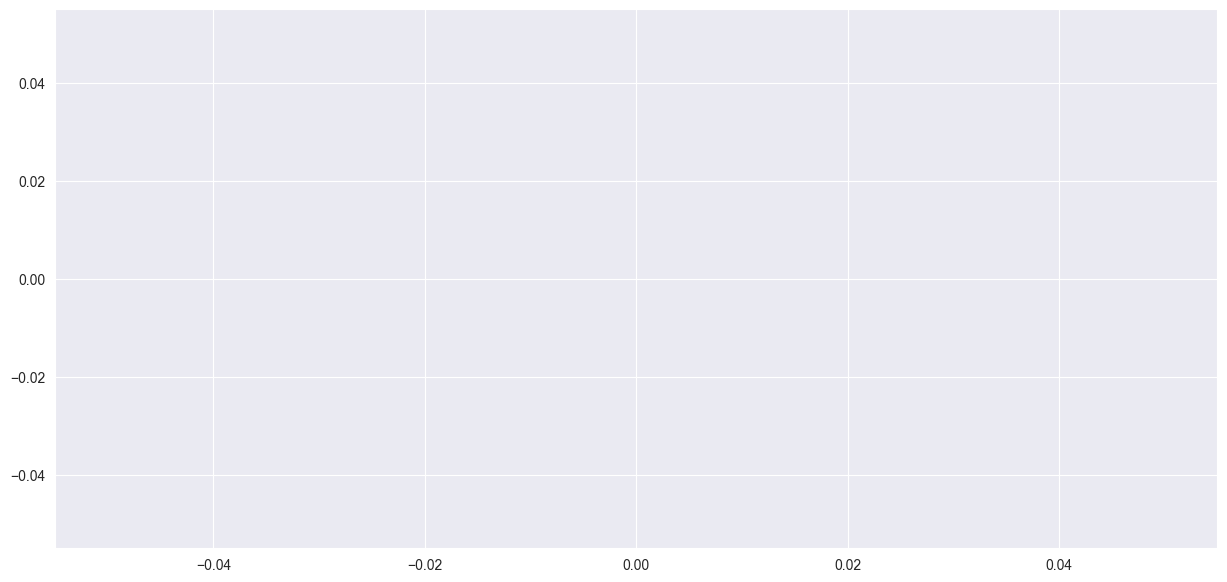

In [20]:
plt.figure(figsize=(15,7))

sns.scatterplot(x=homicidios['N_VICTIMAS'], y=homicidios['LUGAR_DEL_HECHO'].value_counts())

plt.show()

In [ ]:
homicidios.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')